In [ ]:
import warnings
import itertools
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import re
plt.style.use('fivethirtyeight')
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import plot_tree, export_text
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.multiclass import OneVsRestClassifier
import os
from sklearn import preprocessing

In [ ]:
data = pd.read_csv('drive/MyDrive/Colab Notebooks/Maternal Health Risk Data Set.csv')

In [ ]:
df = data.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
describeNum = df.describe(include =['float64', 'int64', 'float', 'int'])
describeNum.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

,count,mean,std,min,25%,50%,75%,max
Age,1014.000000,29.871795,13.474386,10.000000,19.000000,26.000000,39.000000,70.000000
SystolicBP,1014.000000,113.198225,18.403913,70.000000,100.000000,120.000000,120.000000,160.000000
DiastolicBP,1014.000000,76.460552,13.885796,49.000000,65.000000,80.000000,90.000000,100.000000
BS,1014.000000,8.725986,3.293532,6.000000,6.900000,7.500000,8.000000,19.000000
BodyTemp,1014.000000,98.665089,1.371384,98.000000,98.000000,98.000000,98.000000,103.000000
HeartRate,1014.000000,74.301775,8.088702,7.000000,70.000000,76.000000,80.000000,90.000000


In [ ]:
data.corr

<bound method DataFrame.corr of       Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0      25         130           80  15.0      98.0         86  high risk
1      35         140           90  13.0      98.0         70  high risk
2      29          90           70   8.0     100.0         80  high risk
3      30         140           85   7.0      98.0         70  high risk
4      35         120           60   6.1      98.0         76   low risk
...   ...         ...          ...   ...       ...        ...        ...
1009   22         120           60  15.0      98.0         80  high risk
1010   55         120           90  18.0      98.0         60  high risk
1011   35          85           60  19.0      98.0         86  high risk
1012   43         120           90  18.0      98.0         70  high risk
1013   32         120           65   6.0     101.0         76   mid risk

[1014 rows x 7 columns]>

In [ ]:
df.shape

(1014, 7)

In [ ]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [ ]:
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null = null[null["% Missing Values"] > 0]
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1) 

,Null Values,% Missing Values


In [ ]:
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num=df.select_dtypes(include=numeric)
df_num.head(3)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80


In [ ]:
df_cat=df.select_dtypes(include='object')
df_cat.head(3)

,RiskLevel
0,high risk
1,high risk
2,high risk


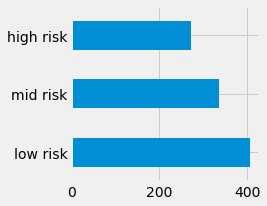

In [ ]:
df['RiskLevel'].value_counts().plot(kind='barh')

In [ ]:

label_encoder = preprocessing.LabelEncoder()
df['RiskLevel']= label_encoder.fit_transform(df['RiskLevel'])

In [ ]:
df['RiskLevel'].unique()

array([0, 1, 2])

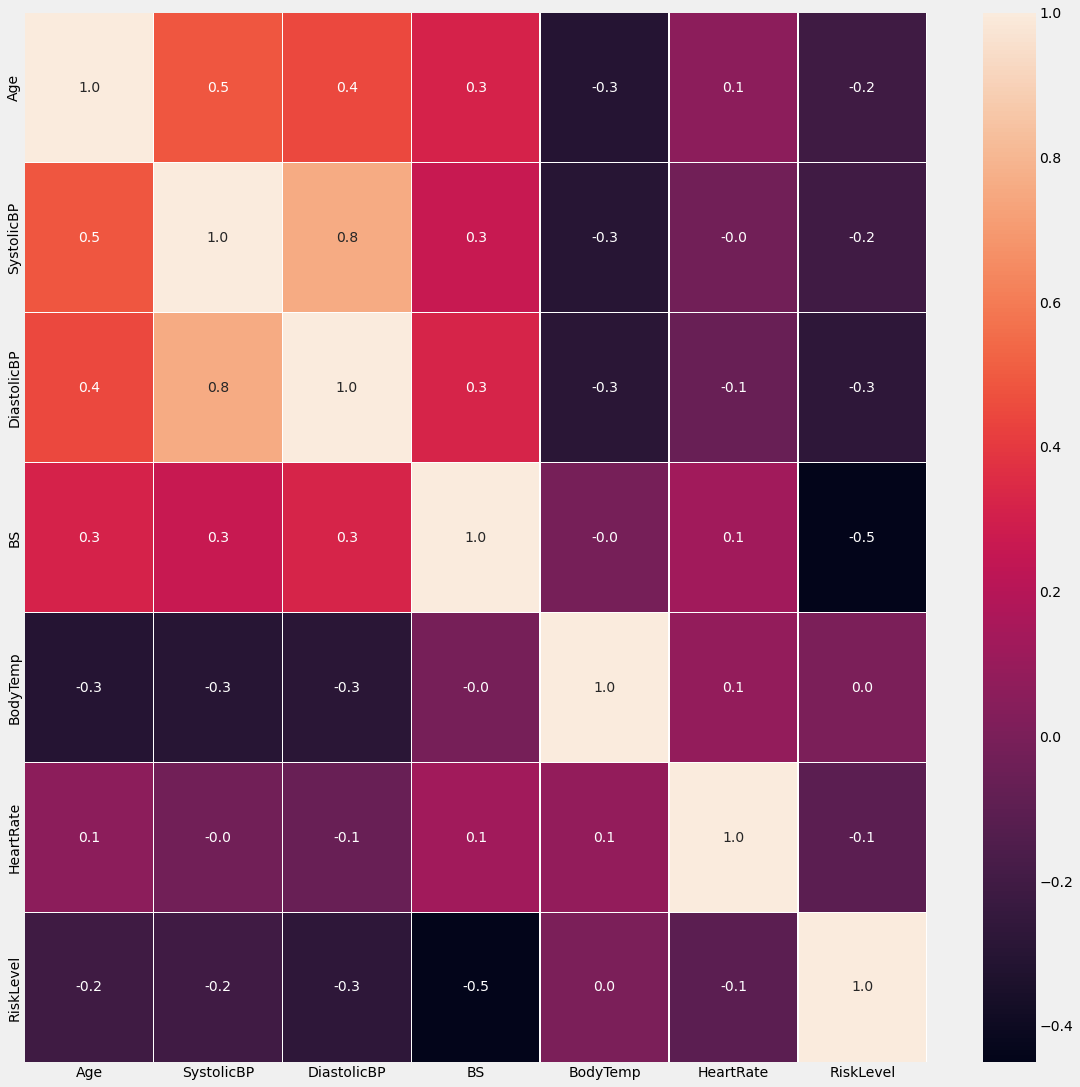

In [ ]:
def draw_heatmap(df):
    
    
    f, ax = plt.subplots(figsize = (18, 18))
    
    corrMatt = df.corr(method='spearman')
    
    sns.heatmap(corrMatt, annot = True, linewidth = 0.5, fmt = '.1f', ax = ax)
    plt.show()
    
    
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    
numerical_df_1= df.select_dtypes(numerics)
numerical_column_names = df.select_dtypes(numerics).columns

draw_heatmap(numerical_df_1)

In [ ]:
duplicate = df[df.duplicated()] 
  
print("Duplicate Rows :")

Duplicate Rows :


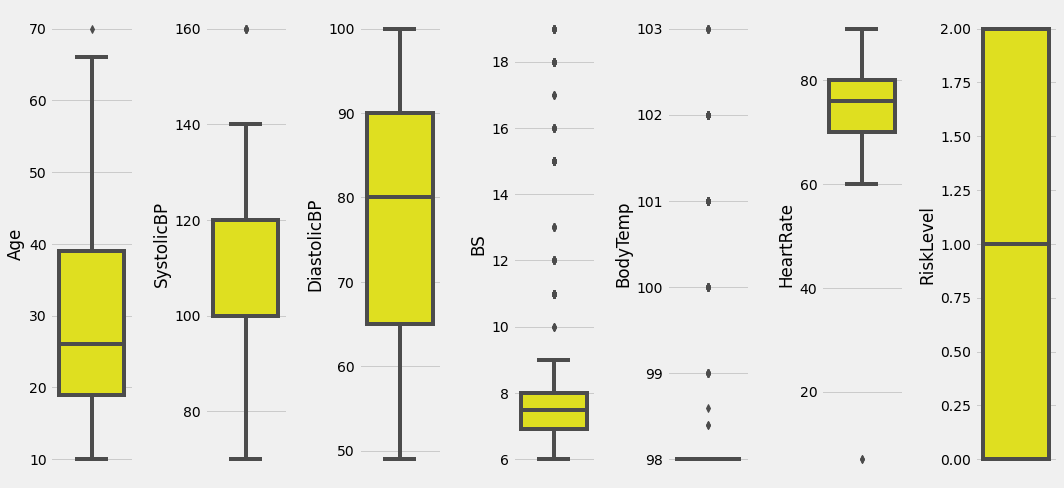

In [ ]:
featuresNumfinal = ['Age','SystolicBP','DiastolicBP','BS','BodyTemp','HeartRate','RiskLevel']

plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNumfinal)):
    plt.subplot(1, len(featuresNumfinal), i+1)
    sns.boxplot(y=df[featuresNumfinal[i]], color='yellow', orient='v')
    plt.tight_layout()

In [ ]:
X = df.drop('RiskLevel', axis = 1)

y = df['RiskLevel']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

In [ ]:
print("Shape of the X Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X test :", X_test.shape)
print("Shape of the y test :", y_test.shape)

Shape of the X Train : (811, 6)
Shape of the y Train : (811,)
Shape of the X test : (203, 6)
Shape of the y test : (203,)


In [ ]:

gnb = GaussianNB()
gnb.fit(X_train, y_train)

  

GaussianNB()

Training Accuracy : 0.6202219482120839
Testing Accuracy : 0.6206896551724138


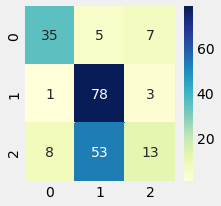

              precision    recall  f1-score   support

           0       0.80      0.74      0.77        47
           1       0.57      0.95      0.72        82
           2       0.57      0.18      0.27        74

    accuracy                           0.62       203
   macro avg       0.64      0.62      0.58       203
weighted avg       0.62      0.62      0.56       203

------------------------------------------


In [ ]:
gnb_predictions = gnb.predict(X_test)


print("Training Accuracy :", gnb.score(X_train, y_train))
print("Testing Accuracy :", gnb.score(X_test, y_test))

cm = confusion_matrix(y_test, gnb_predictions)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()
cr1 = classification_report(y_test, gnb_predictions)
print(cr1)

print("------------------------------------------")

In [ ]:
#import pickle
#pickle.dump(gnb, open('drive/MyDrive/Colab Notebooks/IoT_model.pkl','wb'))

Training Accuracy : 0.9247842170160296
Testing Accuracy : 0.8719211822660099


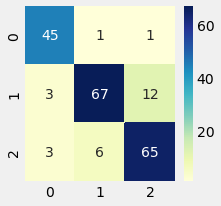

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        47
           1       0.91      0.82      0.86        82
           2       0.83      0.88      0.86        74

    accuracy                           0.87       203
   macro avg       0.87      0.88      0.88       203
weighted avg       0.87      0.87      0.87       203

------------------------------------------


In [ ]:
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)


rdf_predictions = classifier.predict(X_test)


print("Training Accuracy :", classifier.score(X_train, y_train))
print("Testing Accuracy :", classifier.score(X_test, y_test))

cm = confusion_matrix(y_test, rdf_predictions)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()
cr1 = classification_report(y_test, rdf_predictions)
print(cr1)

print("------------------------------------------")


Training Accuracy : 0.9247842170160296
Testing Accuracy : 0.8768472906403941


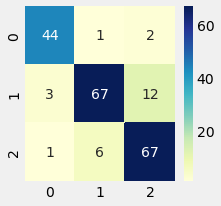

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        47
           1       0.91      0.82      0.86        82
           2       0.83      0.91      0.86        74

    accuracy                           0.88       203
   macro avg       0.88      0.89      0.88       203
weighted avg       0.88      0.88      0.88       203

------------------------------------------


In [ ]:
ovr = OneVsRestClassifier(classifier)
ovr.fit(X_train,y_train)


ovr_predictions = ovr.predict(X_test)

print("Training Accuracy :", ovr.score(X_train, y_train))
print("Testing Accuracy :", ovr.score(X_test, y_test))

cm = confusion_matrix(y_test, ovr_predictions)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()
cr1 = classification_report(y_test, ovr_predictions)
print(cr1)

print("------------------------------------------")

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
ovo = OneVsOneClassifier(classifier)
ovo.fit(X_train,y_train)


ovo_predictions = ovo.predict(X_test)

print("Training Accuracy :", ovo.score(X_train, y_train))
print("Testing Accuracy :", ovo.score(X_test, y_test))

cm = confusion_matrix(y_test, ovo_predictions)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()
cr1 = classification_report(y_test, ovo_predictions)
print(cr1)

print("------------------------------------------")

Training Accuracy : 0.8212083847102343
Testing Accuracy : 0.7881773399014779


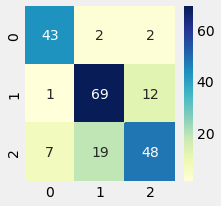

              precision    recall  f1-score   support

           0       0.84      0.91      0.88        47
           1       0.77      0.84      0.80        82
           2       0.77      0.65      0.71        74

    accuracy                           0.79       203
   macro avg       0.79      0.80      0.80       203
weighted avg       0.79      0.79      0.78       203

------------------------------------------


In [ ]:


#train
xgb = XGBClassifier()

xgb.fit(X_train,y_train)

#predict
y_predicted_xgb = xgb.predict(X_test)

print("Training Accuracy :", xgb.score(X_train, y_train))
print("Testing Accuracy :", xgb.score(X_test, y_test))

#eval
cm = confusion_matrix(y_test, y_predicted_xgb)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()
cr1 = classification_report(y_test, y_predicted_xgb)
print(cr1)

print("------------------------------------------")


In [ ]:

dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

Training Accuracy : 0.9247842170160296
Testing Accuracy : 0.8768472906403941


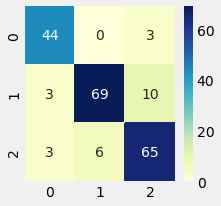

In [ ]:
y_pred_dt = dt.predict(X_test)

print("Training Accuracy :", dt.score(X_train, y_train))
print("Testing Accuracy :", dt.score(X_test, y_test))
cm = confusion_matrix(y_test, y_pred_dt)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

In [ ]:
cr = classification_report(y_test, y_pred_dt)
print(cr)
print("------------------------------------------")


              precision    recall  f1-score   support

           0       0.88      0.94      0.91        47
           1       0.92      0.84      0.88        82
           2       0.83      0.88      0.86        74

    accuracy                           0.88       203
   macro avg       0.88      0.89      0.88       203
weighted avg       0.88      0.88      0.88       203

------------------------------------------


Depth of the decision tree 17


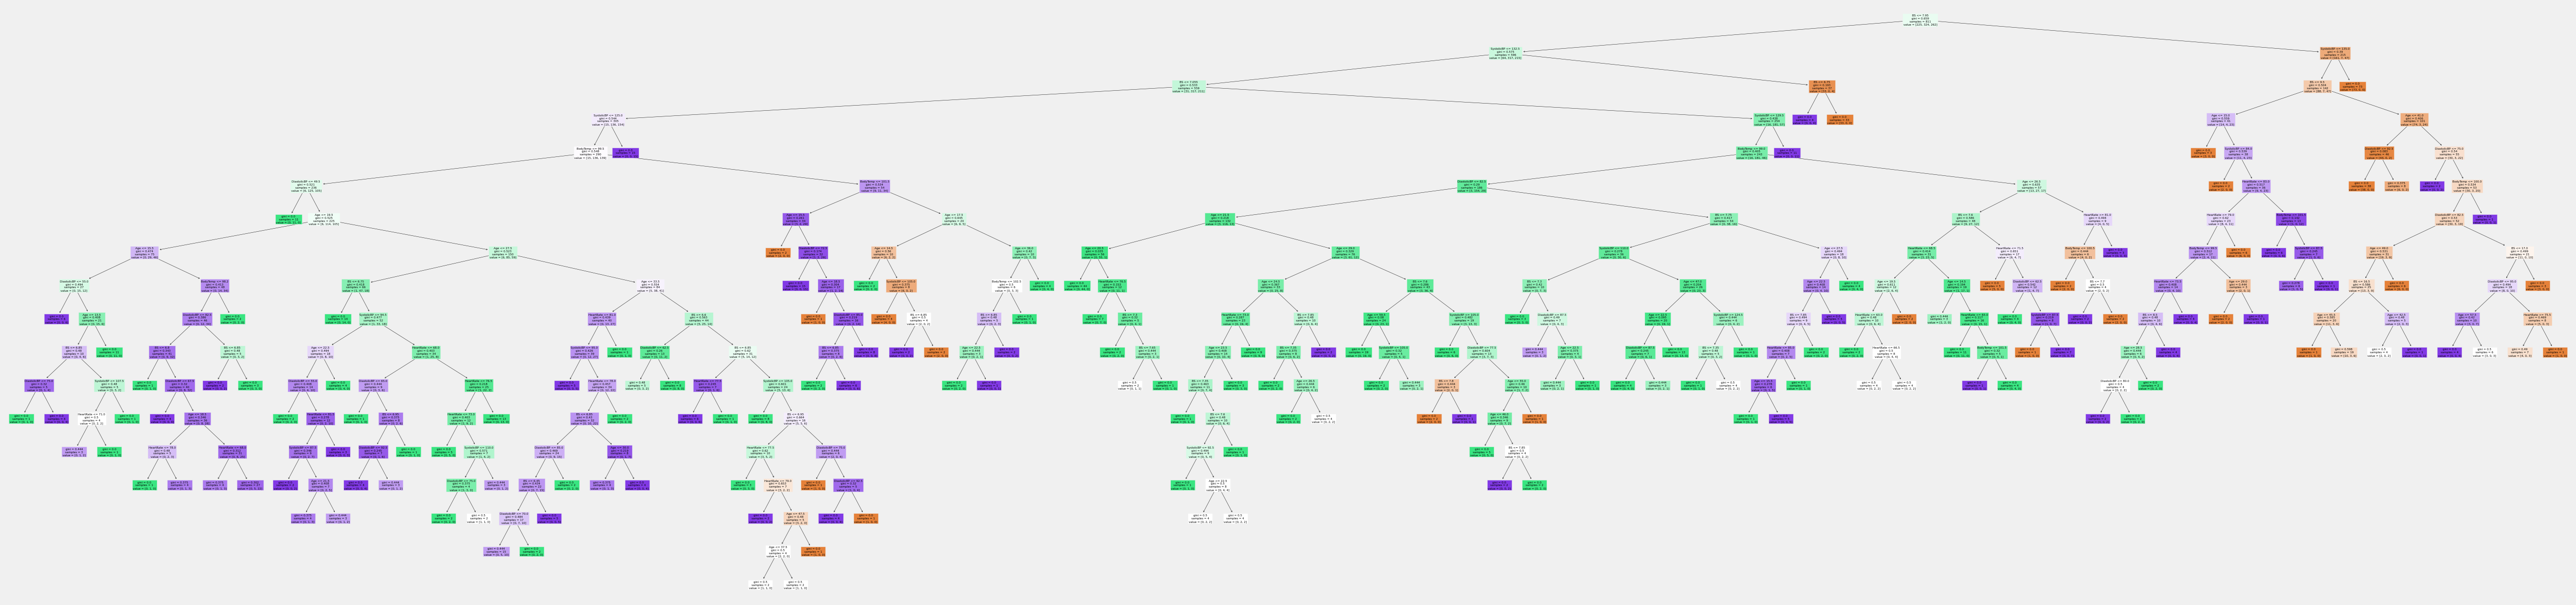

In [ ]:

plt.figure(figsize=(80,20))
plot_tree(dt, feature_names=X_train.columns,  filled=True);
print("Depth of the decision tree", dt.tree_.max_depth)
importance_feature=pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": dt.feature_importances_
}).sort_values("Importance", ascending=False)

In [ ]:

NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_nb = NB_classifier.predict(X_test)

print("Training Accuracy :", NB_classifier.score(X_train, y_train))
print("Testing Accuracy :", NB_classifier.score(X_test, y_test))

Training Accuracy : 0.6202219482120839
Testing Accuracy : 0.6206896551724138


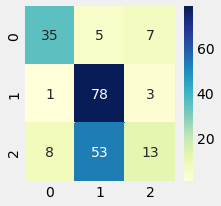

              precision    recall  f1-score   support

           0       0.80      0.74      0.77        47
           1       0.57      0.95      0.72        82
           2       0.57      0.18      0.27        74

    accuracy                           0.62       203
   macro avg       0.64      0.62      0.58       203
weighted avg       0.62      0.62      0.56       203

------------------------------------------


In [ ]:
cm = confusion_matrix(y_test, y_pred_nb)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()
cr = classification_report(y_test, y_pred_nb)
print(cr)
print("------------------------------------------")

In [ ]:
SVC_classifier = SVC(kernel = 'rbf', random_state = 0)
SVC_classifier.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
y_pred_svc = SVC_classifier.predict(X_test)

print("Training Accuracy :", SVC_classifier.score(X_train, y_train))
print("Testing Accuracy :", SVC_classifier.score(X_test, y_test))
cr = classification_report(y_test, y_pred_svc)
print(cr)
print("------------------------------------------")

Training Accuracy : 0.5992601726263872
Testing Accuracy : 0.6600985221674877
              precision    recall  f1-score   support

           0       0.83      0.72      0.77        47
           1       0.59      0.88      0.70        82
           2       0.72      0.38      0.50        74

    accuracy                           0.66       203
   macro avg       0.71      0.66      0.66       203
weighted avg       0.69      0.66      0.64       203

------------------------------------------


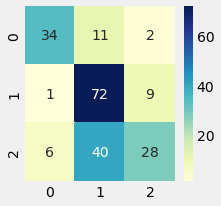

In [ ]:
cm = confusion_matrix(y_test, y_pred_svc)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

In [ ]:
def get_models():
	models = dict()
	# evaluate k values from 1 to 20
	for i in range(1,21):
		# define the base model
		base = KNeighborsClassifier(n_neighbors=i)
		# define the ensemble model
		models[str(i)] = BaggingClassifier(base_estimator=base)
	return models

In [ ]:
def evaluate_model(model, X_train, y_train):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

In [ ]:
models = get_models()

results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X_train, y_test)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.817 (0.033)
>2 0.781 (0.037)
>3 0.751 (0.044)
>4 0.728 (0.041)
>5 0.713 (0.052)
>6 0.705 (0.036)
>7 0.688 (0.047)
>8 0.679 (0.046)
>9 0.676 (0.046)
>10 0.663 (0.046)
>11 0.663 (0.045)
>12 0.655 (0.039)
>13 0.655 (0.041)
>14 0.651 (0.041)
>15 0.648 (0.045)
>16 0.644 (0.039)
>17 0.646 (0.042)
>18 0.649 (0.048)
>19 0.644 (0.040)
>20 0.639 (0.037)


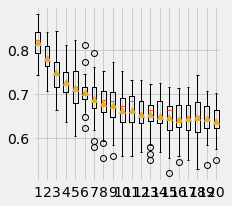

In [ ]:

plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [ ]:
gnb_train = gnb.score(X_train, y_train)
gnb_test = gnb.score(X_test,y_test)
rdf_train = classifier.score(X_train, y_train)
rdf_test = classifier.score(X_test,y_test)
xbg_train = xgb.score(X_train,y_train)
xgb_test = xgb.score(X_test,y_test)
dt_train = dt.score(X_train, y_train)
dt_test = dt.score(X_test, y_test)
nb_train = NB_classifier.score(X_train, y_train)
nb_test = NB_classifier.score(X_test, y_test)
svc_train = SVC_classifier.score(X_train, y_train)
svc_test = SVC_classifier.score(X_test, y_test)
ovr_train = ovr.score(X_train, y_train)
ovr_test =  ovr.score(X_test, y_test)
ovo_train = ovo.score(X_train, y_train)
ovo_test = ovo.score(X_test, y_test)

In [ ]:
data = {'Model': ['GaussianNB', 'Random Forest', 'XG Boost', 'Decision Tree', ' Navie Bayes', 'SVM','OnevsRest Classifier','OnevsOne Classifier'], 'Train Accuracy': [gnb_train, rdf_train, xbg_train, dt_train,nb_train,svc_train,ovr_train,ovo_train] , 'Test Accuracy' : [gnb_test,rdf_test,xgb_test,dt_test,nb_test,svc_test,ovr_test,ovo_test]} 

In [ ]:
output = pd.DataFrame(data) 

In [ ]:
print(output)

                  Model  Train Accuracy  Test Accuracy
0            GaussianNB        0.620222       0.620690
1         Random Forest        0.924784       0.871921
2              XG Boost        0.821208       0.788177
3         Decision Tree        0.924784       0.876847
4           Navie Bayes        0.620222       0.620690
5                   SVM        0.599260       0.660099
6  OnevsRest Classifier        0.924784       0.876847
7   OnevsOne Classifier        0.924784       0.881773


In [ ]:
'''from sklearn.multiclass import OutputCodeClassifier
model = RandomForestClassifier()
occ_clf = OutputCodeClassifier(model, code_size = 3)
occ_clf.fit(X_train, y_train)
y_pred = occ_clf.predict(X_test)
print("Accuracy:  %1.3f" % (accuracy_score(y_test, y_pred)))'''

Accuracy:  0.872
